# General Error Mitigation (GEM)

In [2]:
import funzioni01 as f1
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.ibmq.job import job_monitor
#from qiskit.providers.ibmq import least_busy
from copy import deepcopy
from qiskit.opflow import Zero, One, I, X, Y, Z
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity
from qiskit.circuit import Parameter
import time
import qiskit.quantum_info as qi
from qiskit.utils import QuantumInstance
import qiskit.ignis.mitigation.measurement as mc
#from qiskit.result import marginal_counts
from sympy import Symbol, Matrix,cos,sin,eye
from sympy.physics.quantum import TensorProduct as Tp
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex as lm 
from qiskit.visualization import array_to_latex


import numpy as np
from math import pi as pi
import matplotlib.pyplot as plt


### Introduction

Measurement error mitigation is based on prepared $2^N$ basis input states and compute the propability of measuring counts in the other basis states. Clearly, the measurement isn't the only type of error that characterizes a quantum simulation, indeed, depending on the depth of the circuit, the measurement's error may be negligible compared to other type of errors.

We propose three different methods, based on Qiskit's Mesurement Error Mitigation model https://qiskit.org/documentation/tutorials/noise/3_measurement_error_mitigation.html, that should take in account also the errors induce by the gates operations.

### Notation 

* Depth of the circuit = number of C-NOT 

## Identity Calibration

Assume that we wish to calibrate a given circuit C of depth D. The Identity Calibration procedure is defined as follows:
* Initialize in a computational basis state
* Add Identity Circuit with the same shape and depth of C
* Measure the qubits
* Repeate for every basis state to calculate the Calibration Matrix M with CompleateMeasFitter function.
* Compute the M matrix for every basis of the Tomography 

Here we present the example for the Single State Evolution circuit

In [ ]:
#manca circuito single column

This is the Identity Circuit only for the target qubit:

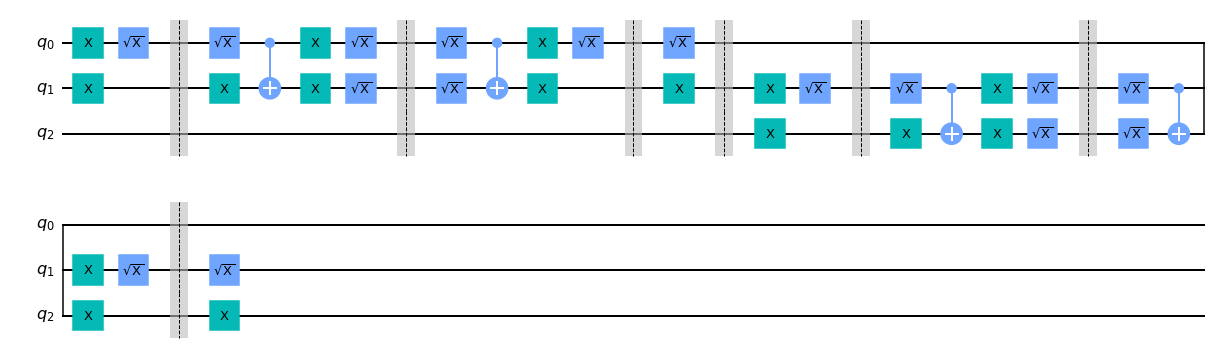

In [13]:
qc.draw(output='mpl')

As we can see the number of C-NOT of the calibration circuit is same as Single State Evolution circuit.

If we want to mitigate also the ancillas, we need to define an Identity circuit for the Check Circuit. The procedur goes as follows for every basis states:
* Initialize in $|000⟩$ 
* Append the Check Circuit 
* After the Check apply X Gates in order to have the desired basis state

This Procedure acts as an identity on every basis states.

Here is the the Identity Circuit considering also the ancillas for the basis state $|0000010⟩$ and the measurement.

The order of the qubits is the same as Jakarta one.


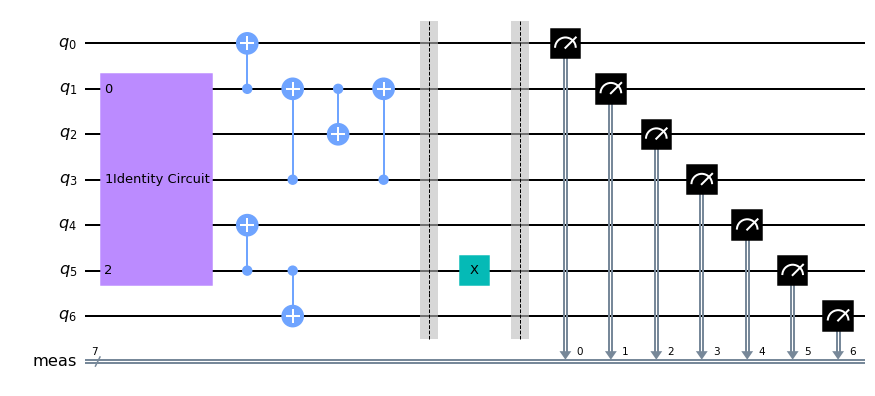

In [14]:
qc1.measure_all()
qc1.draw(output='mpl')

To compute $M$ in a basis $H$ of the Tomography we calculate:

$M'=HMH^{\dagger}$

## Circuit Calibration

### Theorical model
Our model assume that the time evolution operator, subject to noise, is link to the ideal one by the following equation:

$ U_{noisy}(t)=CU_{ideal}(t)$

Where C is a stochastic Matrix that describe how the gates and the measurement noises act on the system.

Given a generic initial state $|\psi(0)⟩$ the final state subject to noise is:

$|\psi_{noisy}(t)⟩=U_{noise}(t)|\psi(0)⟩=CU_{ideal}(t)|\psi(0)⟩ $

That implies:

$|\psi_{noisy}(t)⟩= C|\psi_{ideal}(t)⟩$

So apply $C^{-1}=(U_{noisy}U_{ideal}^{\dagger}(t))^{-1}$ to $|\psi_{noisy}(t)⟩ $ gives $|\psi_{ideal}(t)⟩$.

Notice that $U_{ideal}$ could be a generic unitary operator 









### Procedure
To have the matrix $C$ we only need to exctract $U_{noise}$, the procedure to do it's basically the same as Identity Calibration but instead of an Identity circuit one apply the $U_{ideal}$ circuit itself to all basis states.

Once $U_{noise}$ is measured, $C^{-1}$ can be compute trivially

For the Tomography the procedure is the same as Identity Calibration method.

## Specific Identity Calibration

This method is specific to any operators that act as an Identity for at least one basis state. 

Let's see the procedure:

* Choose one eigenvector of the computational basis 
* Apply the circuit we want to simulate
* Apply X gate in order to have the basis state we want to measure
* Repeat it for every basis state to calculate a Calibration Matrix $M$ similarly to Qiskit method

If we want to mitigate also the ancillas the procedure is the same as Identity Calibration.

The procedure act as an identity on every basis state.

Let's see an example with the Single State Evolution:

Here we have the Single State Evolution matrix specific for the state $|011⟩$

In [ ]:
# va messa la matrice della single column

We choose $|000⟩$ as basis state at which the Single State Evolution act as an Identity

For example, if we want to measure the second column of the matrix $M$, so the one relative to the basis state $|001⟩$, the corrisponded calibration circuit is the following: 

In [ ]:
# circuito di calibrazione per lo stato |001⟩


Repeating this procedure for all basis state gives $M$